## Import Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [2]:
df = pd.read_csv("mcdonalds.csv") # reading the dataset

## EDA

In [3]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [4]:
df.shape

(1453, 15)

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df.isnull().sum() # checking if there is any null values in dataset

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

### visualization of dataset

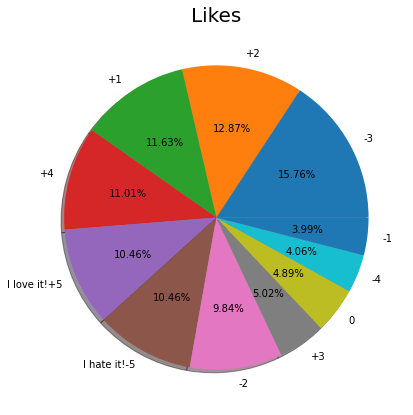

In [15]:
#Gender
labels = df['Like'].unique()
size = df['Like'].value_counts()
#colors = ['green', 'cyan']
#explode = [0, 0]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Likes', fontsize = 20)
plt.axis('off')
plt.show()

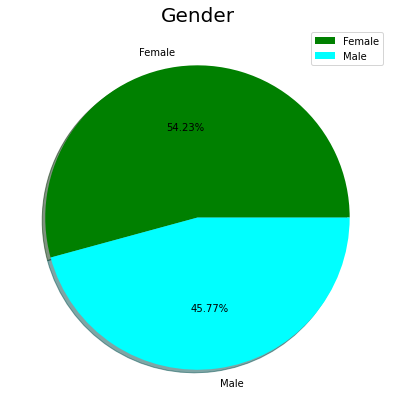

In [16]:
#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['green', 'cyan']
explode = [0, 0]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

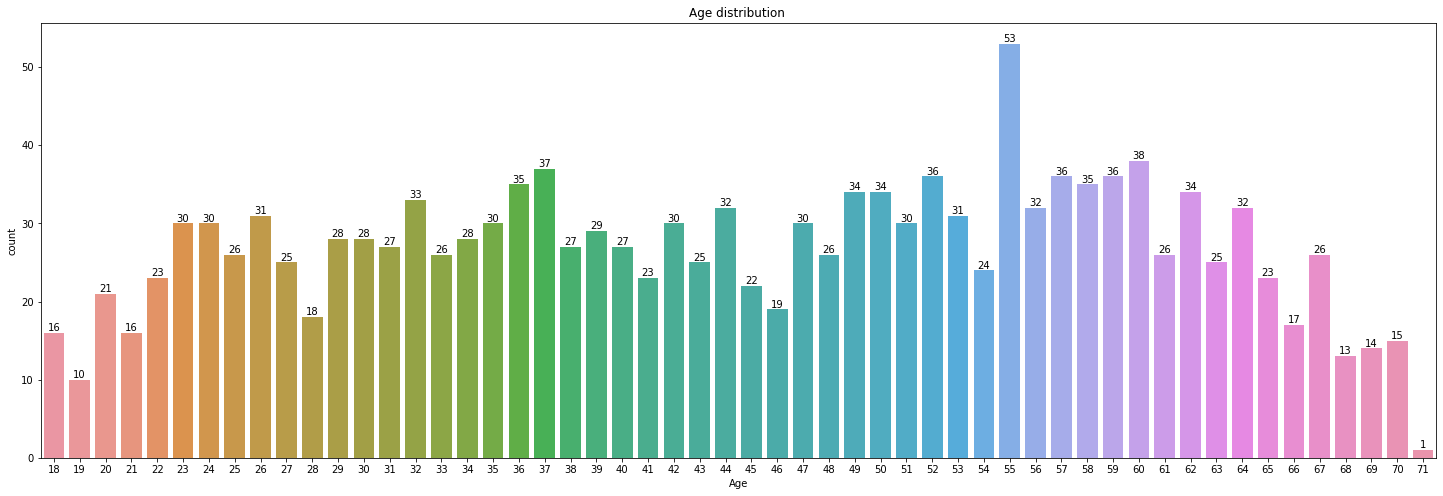

In [11]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'])
f.bar_label(f.containers[0])
plt.title('Age distribution ')
plt.show()

In [17]:
visit_frequency = df['VisitFrequency'].value_counts()
print(visit_frequency)

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


In [20]:

def encoding(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

categories = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in categories:
    encoding(i)

In [24]:
df['Like'] = df['Like'].replace({'+2':'2', '+1':'1', '+4':'4', 'I love it!+5':'5', 'I hate it!-5':'-5', '+3':'3'})

In [29]:
df = df.merge(pd.get_dummies(df['VisitFrequency'],drop_first=True),left_index=True,right_index=True)

In [32]:
df = df.merge(pd.get_dummies(df['Gender'],drop_first=True),left_index=True,right_index=True)

In [37]:
df = df.drop(['VisitFrequency','Gender'],axis=1)

In [38]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,More than once a week,Never,Once a month,Once a week,Once a year,Male
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,0,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,0,0,0,0,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,0,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,0,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,0,0,0,0,1


## Model Building

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA (without limiting the number of components yet)
pca = PCA()
pca.fit(X_scaled)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f} ({ratio*100:.2f}% explained variance)")



Component 1: 0.2123 (21.23% explained variance)
Component 2: 0.0989 (9.89% explained variance)
Component 3: 0.0840 (8.40% explained variance)
Component 4: 0.0703 (7.03% explained variance)
Component 5: 0.0655 (6.55% explained variance)
Component 6: 0.0589 (5.89% explained variance)
Component 7: 0.0560 (5.60% explained variance)
Component 8: 0.0518 (5.18% explained variance)
Component 9: 0.0488 (4.88% explained variance)
Component 10: 0.0435 (4.35% explained variance)
Component 11: 0.0378 (3.78% explained variance)
Component 12: 0.0330 (3.30% explained variance)
Component 13: 0.0297 (2.97% explained variance)
Component 14: 0.0277 (2.77% explained variance)
Component 15: 0.0258 (2.58% explained variance)
Component 16: 0.0159 (1.59% explained variance)
Component 17: 0.0150 (1.50% explained variance)
Component 18: 0.0134 (1.34% explained variance)
Component 19: 0.0116 (1.16% explained variance)


In [45]:

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
yummy,0.010120,-0.103829,-0.004502,0.094024,-0.144831,-0.008046,0.612893,-0.133390,-0.086443
convenient,0.001527,-0.034374,-0.066466,0.007618,-0.017580,-0.035709,0.021895,-0.186116,0.098955
spicy,-0.002983,-0.002914,0.020772,-0.028987,0.040363,-0.046728,0.162389,0.124241,0.081949
fattening,0.003261,0.023066,0.015283,-0.238242,-0.094419,-0.247337,-0.026642,-0.318006,-0.120117
greasy,0.008052,0.055383,0.088509,-0.598242,-0.000921,-0.589863,0.194498,0.230168,0.191433
fast,0.000477,-0.016825,-0.127971,-0.010553,0.008097,-0.061466,0.008098,-0.110541,0.049081
cheap,-0.000518,-0.026358,-0.675885,-0.011239,0.173794,-0.161238,0.057122,0.089169,-0.001405
tasty,0.006809,-0.097743,-0.040119,0.108682,-0.121298,-0.051224,0.635569,-0.239139,-0.015352
expensive,0.002320,0.026969,0.659265,-0.049984,-0.118990,0.103942,0.091446,0.035608,0.020534


In [54]:
from sklearn.decomposition import PCA

# Reduce data to 2 components for visualization
pca = PCA(n_components=9)
data_pca = pca.fit_transform(X_scaled)

In [55]:
data_pca

array([[ 1.30045865, -0.98368177,  0.40460217, ..., -0.1936895 ,
        -0.44605662, -1.66014499],
       [-0.69255625,  0.46819286, -0.88998158, ...,  0.12333829,
         0.61717829, -0.98550006],
       [ 0.13598397,  0.53785769,  1.41811354, ..., -1.54522496,
         2.05306757, -1.19015481],
       ...,
       [-1.27784837,  1.40420141,  0.58910142, ..., -0.10618697,
         0.30235241, -1.59374232],
       [-2.44868648, -1.07876142,  2.02268951, ...,  0.29801023,
        -0.53954864,  1.45325649],
       [ 3.04105178,  2.46922443,  0.13250917, ...,  0.20617414,
        -0.1612502 ,  1.33794254]])

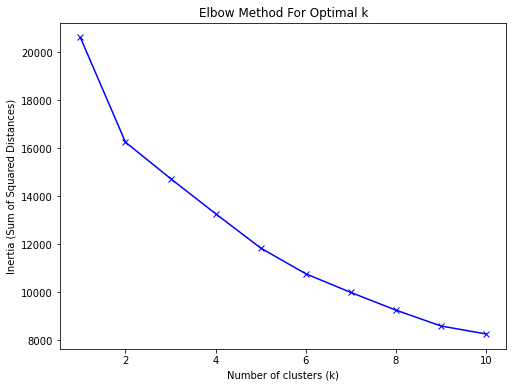

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generating sample data
X, y = make_blobs(n_samples=500, centers=5, random_state=42, cluster_std=1.5)

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Testing for 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.show()


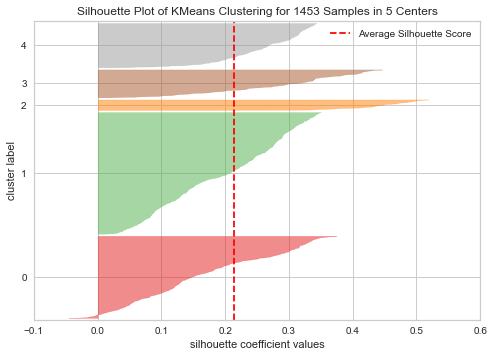

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer

# Visualize the silhouette plot
model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_pca)
visualizer.show()


In [62]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(data_pca)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[4 1 1 ... 1 3 2]
12122.826346865584
13
[[-1.51129056  0.39066635 -0.35339214  1.87995347 -0.19413732 -0.8948336
  -0.73968318  0.0397954  -0.19749676]
 [-0.28953124  1.59628077  0.38600485 -0.63510129 -0.25671447  0.44129066
  -0.04196253 -0.07526344 -0.27936566]
 [ 3.55077775  0.10598146  0.33442421  0.48502864  1.41316187 -0.06230355
   0.17726869  0.19038194 -0.2955451 ]
 [-1.51015334 -0.61408169  0.01283148 -0.58949566  0.47647438  0.14051724
   0.27546006  0.01668606  0.20645836]
 [ 1.49520136 -1.02359145 -0.34154454 -0.18971787 -1.16812292  0.05823407
   0.07515963 -0.09562867  0.29663822]]


In [63]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,More than once a week,Never,Once a month,Once a week,Once a year,Male,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,0,0,0,0,4
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0,0,0,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0,0,0,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,0,0,1,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,0,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,0,0,0,0,1,1,4
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,0,0,1,0,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,0,1,0,0,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,0,0,0,0,1,3
